<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/08_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means elbow method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [13]:
# Generate synthetic data
def generate_data():
    """
    Generate synthetic data for clustering.
    """
    np.random.seed(42)
    X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)
    return X

# Elbow method: Calculate inertia for different cluster sizes
def calculate_inertia(X, max_k=10):
    """
    Compute inertia for k-means clustering with different values of k.
    - X: Input data
    - max_k: Maximum number of clusters to test
    """
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    return inertias

# Visualize the clustering results for each k
def visualize_clusters_for_each_k(X, max_k=10):
    """
    Perform k-means clustering and visualize results for each k.
    - X: Input data
    - max_k: Maximum number of clusters to test
    """
    plt.figure(figsize=(20, 15))  # Adjust figure size

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

        # Plot clustering results for each k
        plt.subplot(3, (max_k + 2) // 3, k)
        for i in range(k):
            plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i + 1}')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
        plt.title(f"K-means with k={k}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

# Plot the elbow curve
def plot_elbow_curve(inertias, max_k):
    """
    Plot the inertia curve for the elbow method.
    - inertias: List of inertia values
    - max_k: Maximum number of clusters
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.grid()
    plt.show()


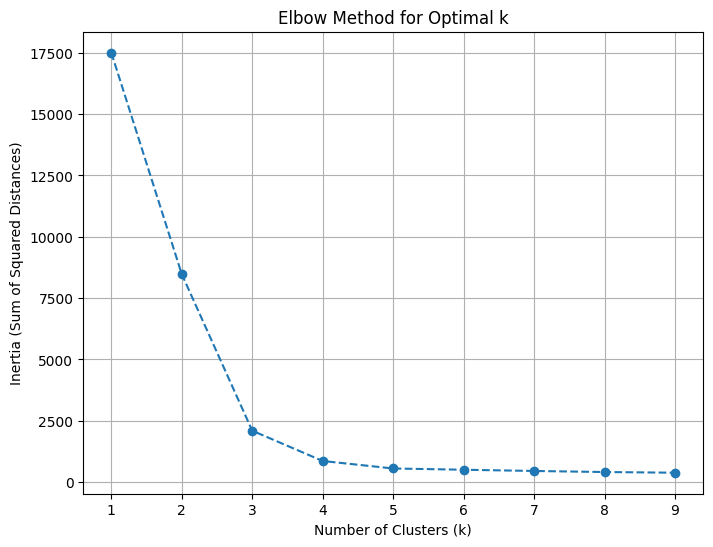

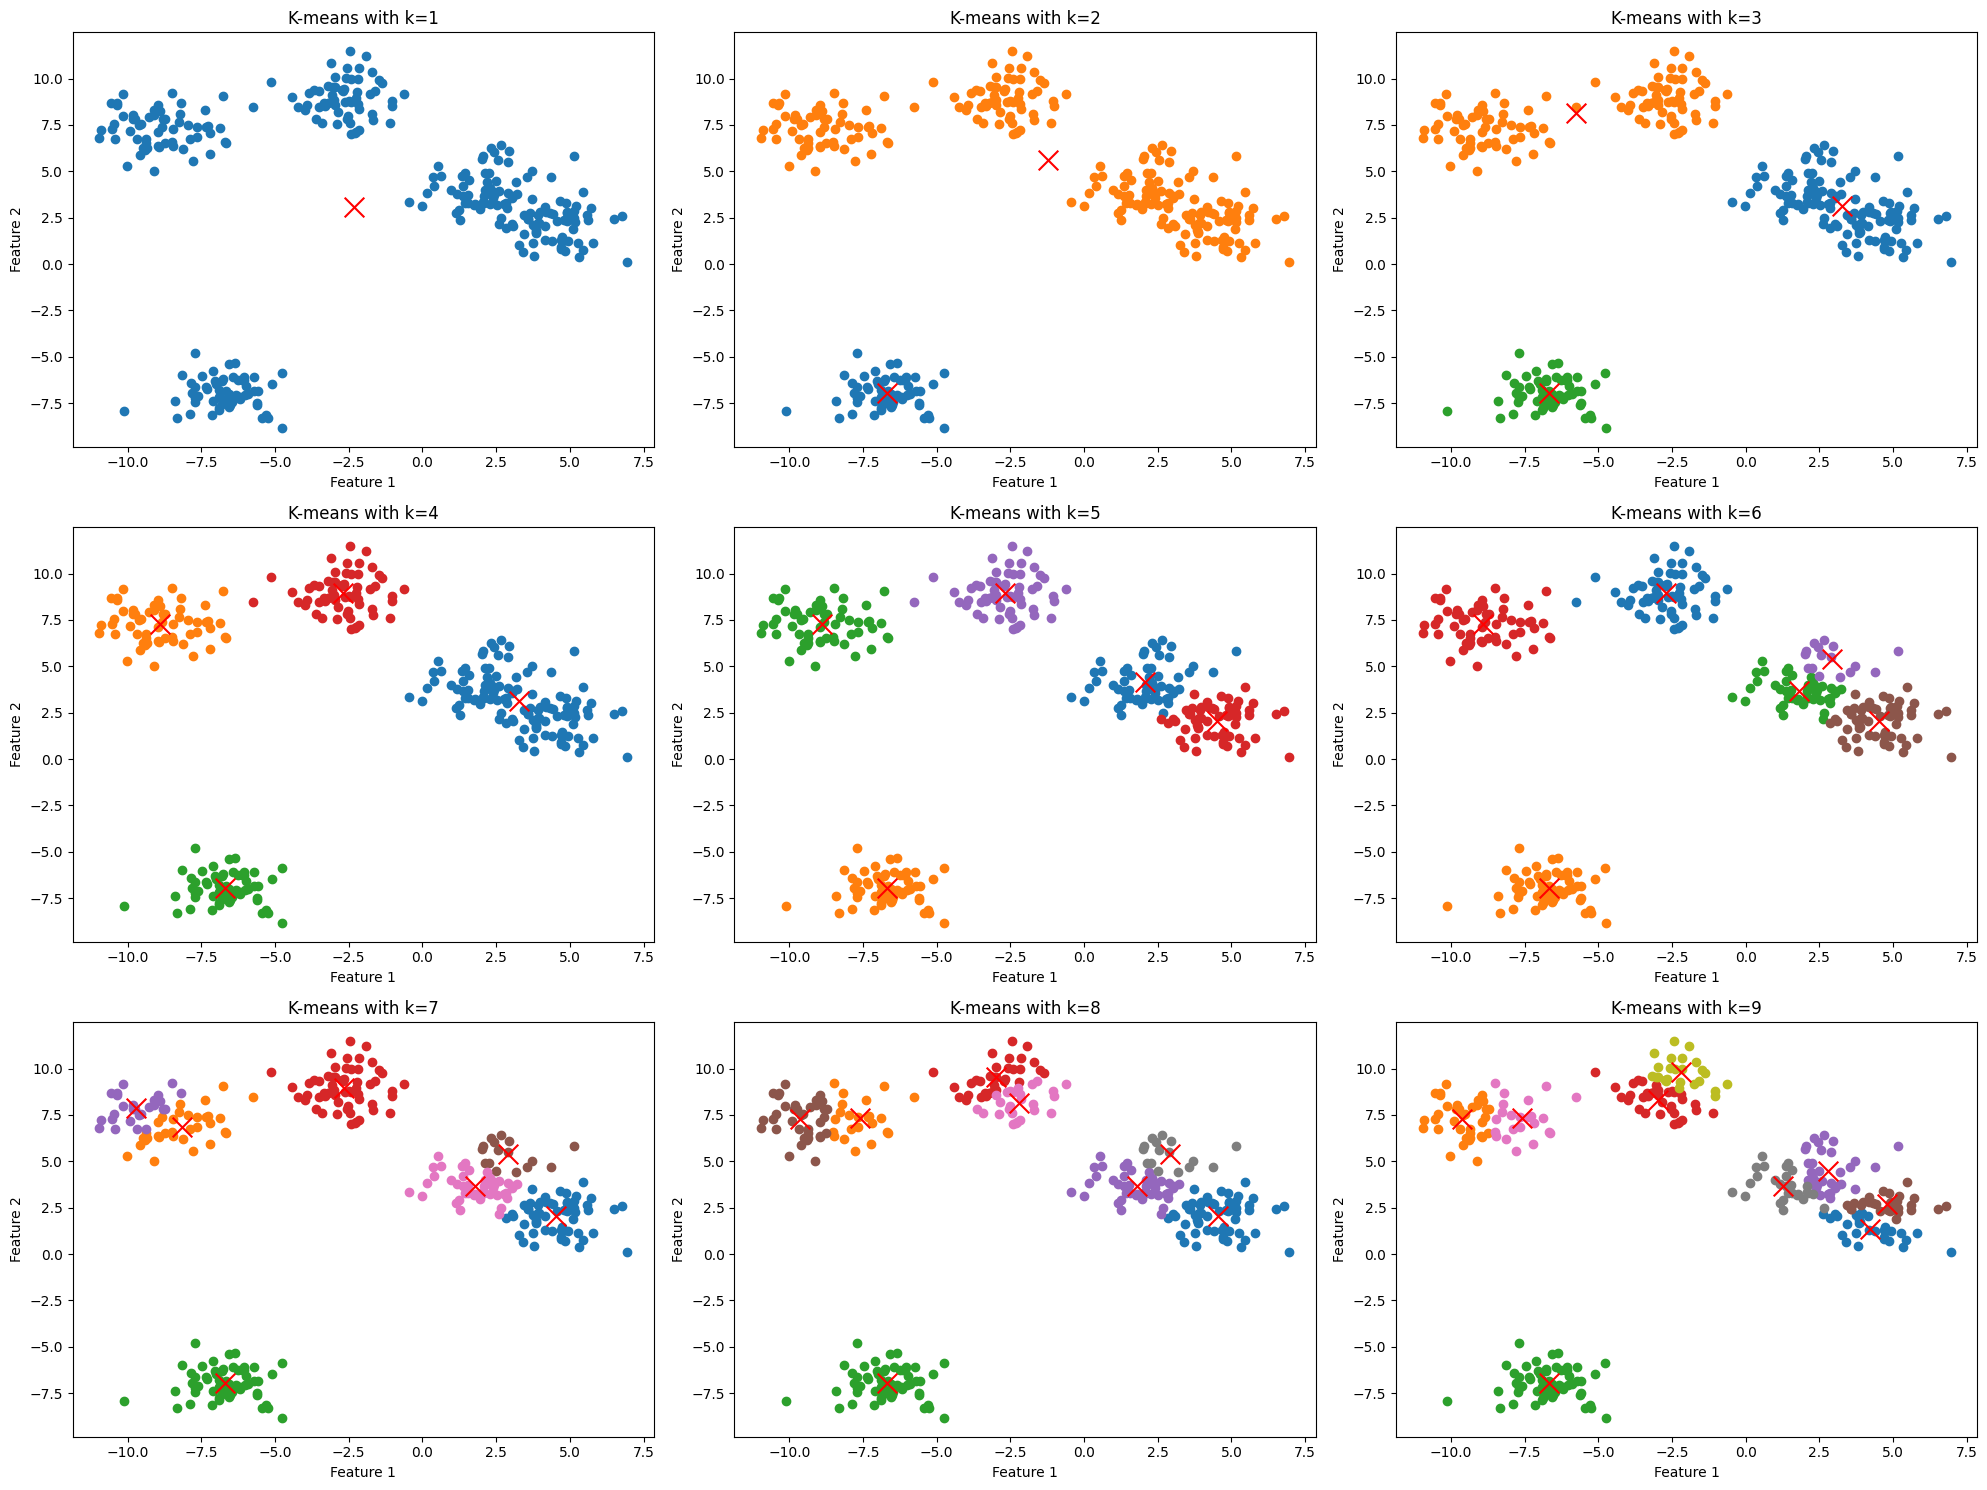

In [14]:

# Main execution
if __name__ == "__main__":
    # Step 1: Generate synthetic data
    data = generate_data()

    # Step 2: Calculate inertia for different k (elbow method)
    max_clusters = 9
    inertias = calculate_inertia(data, max_k=max_clusters)

    # Step 3: Plot the elbow curve
    plot_elbow_curve(inertias, max_clusters)

    # Step 4: Visualize clustering results for each k
    visualize_clusters_for_each_k(data, max_k=max_clusters)
